In [1]:
data(titanic_imputed, package = "DALEX")

model <- ranger::ranger(survived~., data = titanic_imputed, classification = TRUE, probability = TRUE)

In [7]:
model_performance(explainer)

Measures for:  classification
recall     : 0.5864979 
precision  : 0.9006479 
f1         : 0.7103918 
accuracy   : 0.8459447 
auc        : 0.9011833

Residuals:
         0%         10%         20%         30%         40%         50% 
-0.78245111 -0.24654066 -0.20489413 -0.18416238 -0.16966953 -0.12959492 
        60%         70%         80%         90%        100% 
-0.09499981  0.03226174  0.23730827  0.59541701  0.88275447 

In [8]:
library(mlr)
titanic_imputed_fct <- titanic_imputed
titanic_imputed_fct$survived <- as.factor(titanic_imputed_fct$survived)

classif_task <- makeClassifTask(data = titanic_imputed_fct, target = "survived")
classif_lrn <- makeLearner("classif.svm", predict.type = "prob")
model_mlr <- train(classif_lrn, classif_task)

In [9]:
library(DALEX)
library(DALEXtra)
explainer <- DALEX::explain(model = model,
                     data = titanic_imputed,
                     y = titanic_imputed$survived)

Preparation of a new explainer is initiated
  -> model label       :  ranger  (  default  )
  -> data              :  2207  rows  8  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.ranger  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package ranger , ver. 0.12.1 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.01580199 , mean =  0.322105 , max =  0.9902344  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.7824511 , mean =  5.177849e-05 , max =  0.8827545  
  A new explainer has been created!  


In [10]:
explainer_mlr <- explain_mlr(model = model_mlr,
                         data = titanic_imputed_fct[,-8],
                         y = as.numeric(as.character(titanic_imputed_fct$survived)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.08631553 , mean =  0.3239874 , max =  0.9598379  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.8640408 , mean =  -0.001830629 , max =  0.9068068  
  A new explainer has been created!  


In [11]:
fi_1 <- model_parts(explainer, B = 10)

In [12]:
fi_2 <- model_parts(explainer_mlr, B = 10)

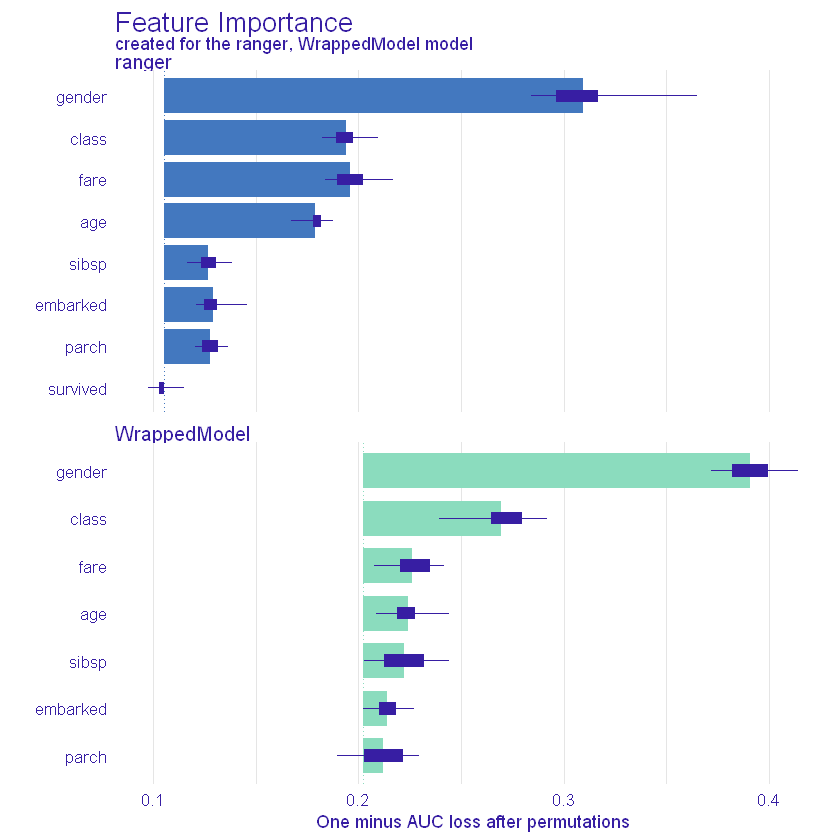

In [13]:
plot(fi_1, fi_2)

In [14]:
?model_parts

In [15]:
?ingredients::feature_importance

In [16]:
?plot.model_parts

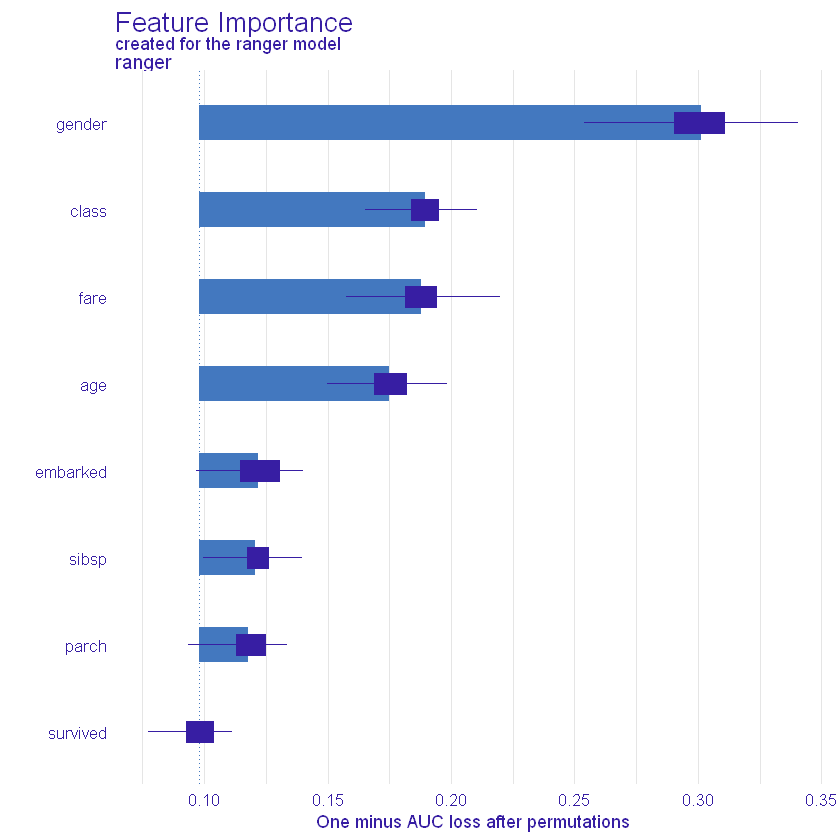

In [21]:
plot(model_parts(explainer, B = 30))

In [22]:
fi_3 <- model_parts(explainer, B = 10, N = 1000)

In [23]:
fi_4 <- model_parts(explainer_mlr, B = 10, N = 1000)

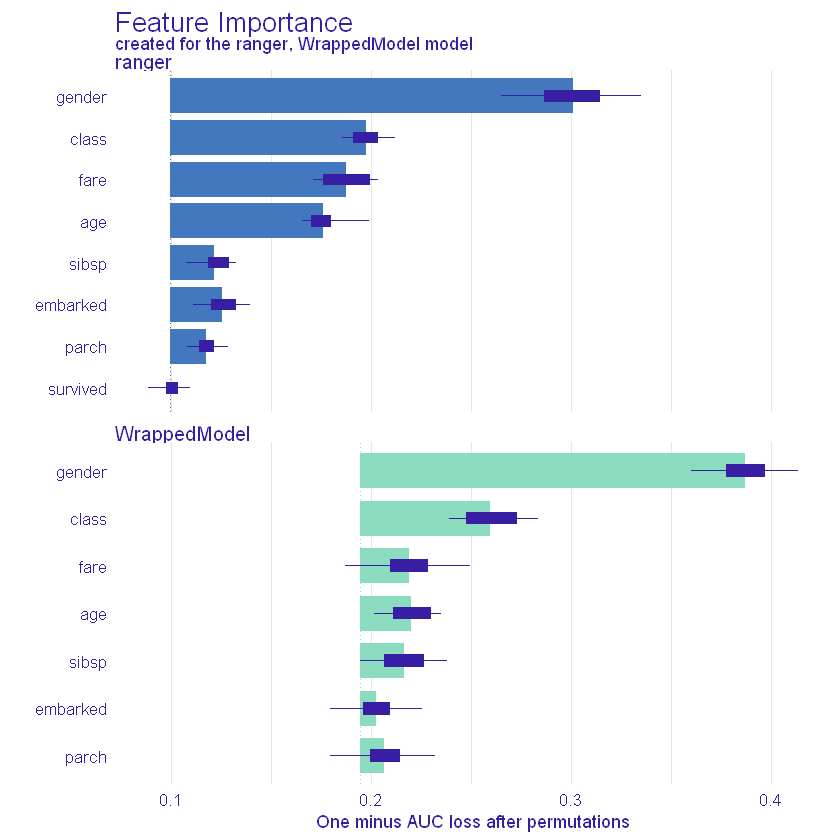

In [24]:
plot(fi_3, fi_4)

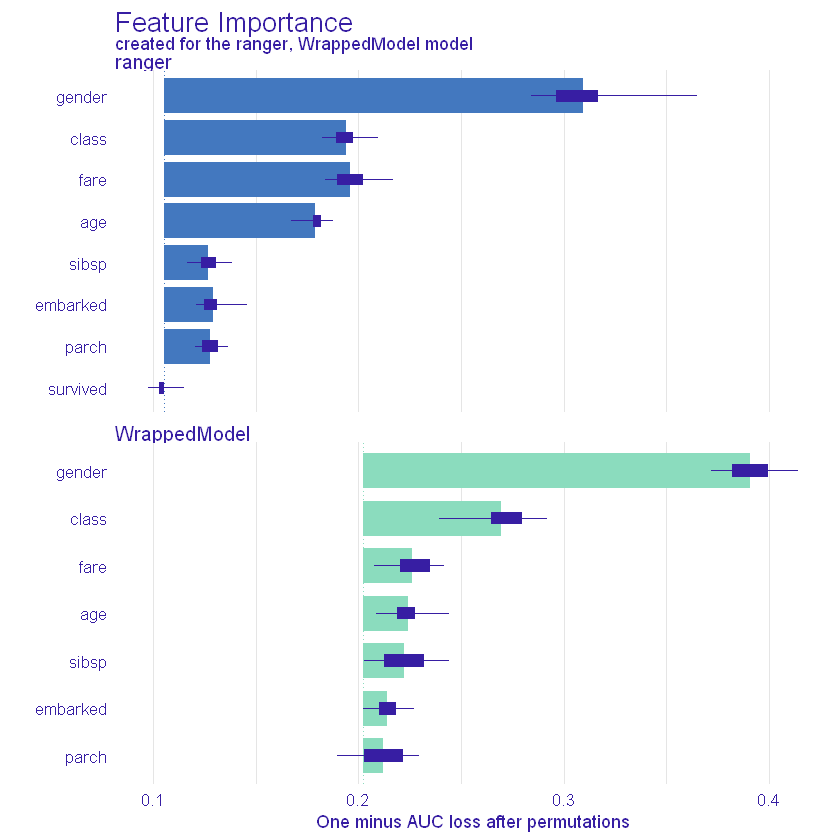

In [25]:
plot(fi_1, fi_2)

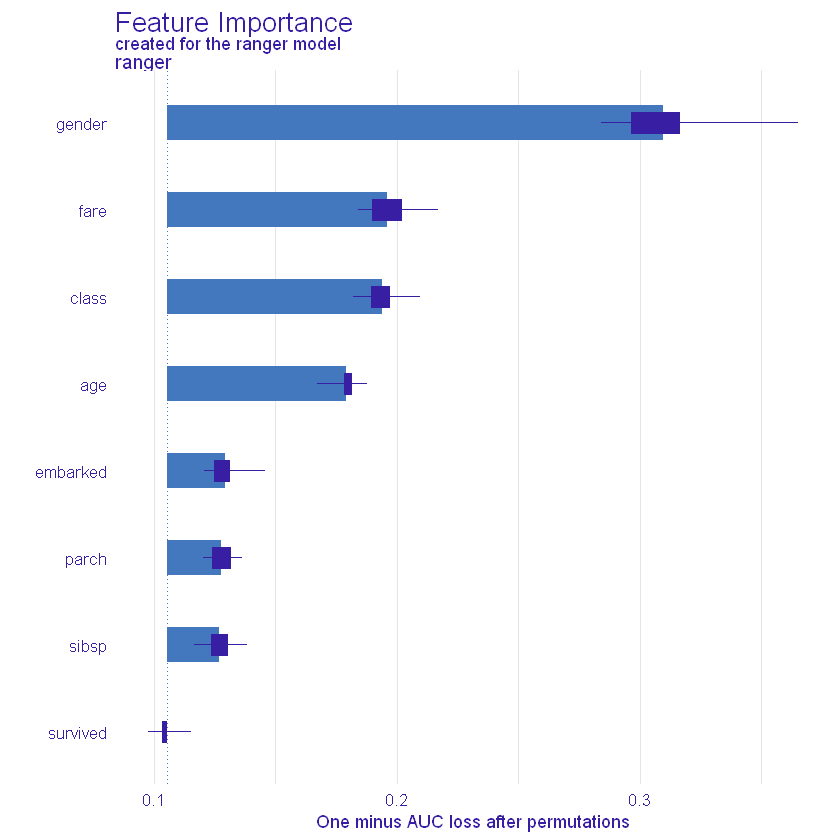

In [26]:
plot(fi_1)

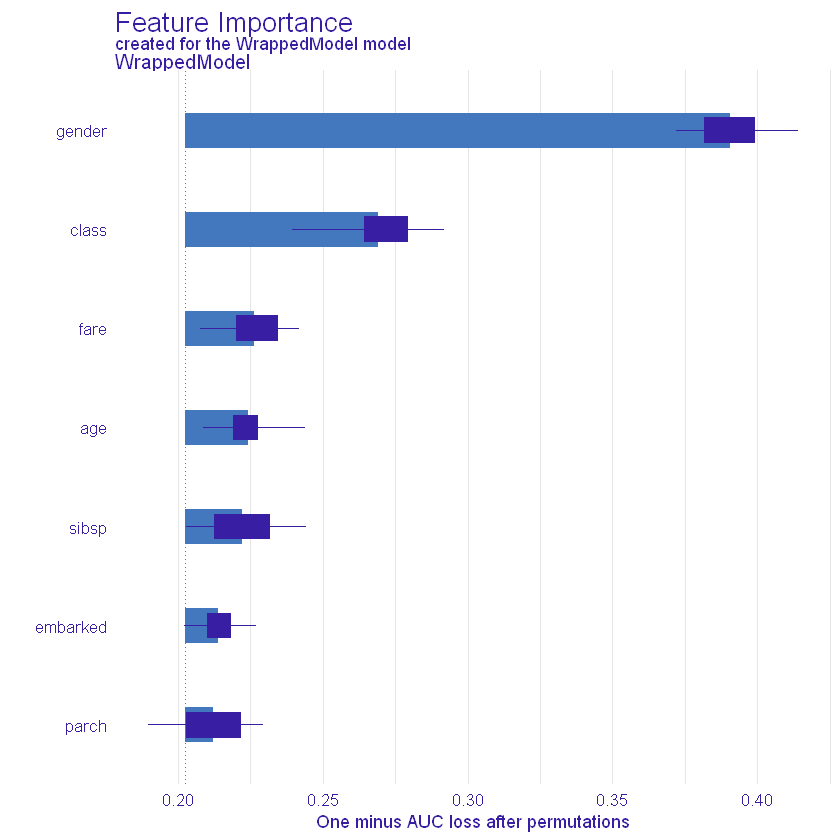

In [27]:
plot(fi_2)